# Challenge 1-- Análisis y seleción de Features

En esta notebook se busca tomar las mejores features para poder tener una predicción mas acertada.

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv('MLA_100k.csv')
X.head()

,Unnamed: 0,condition,base_price,seller_id,price,accepts_mercadopago,automatic_relist,initial_quantity,sold_quantity,available_quantity,shipping.local_pick_up,shipping.free_shipping
0,0,1,80.0,74952096,80.0,1,0,1,0,1,1,0
1,1,0,2650.0,42093335,2650.0,1,0,1,0,1,1,0
2,2,0,60.0,133384258,60.0,1,0,1,0,1,1,0
3,3,1,580.0,143001605,580.0,1,0,1,0,1,1,0
4,4,0,30.0,96873449,30.0,1,0,1,0,1,1,0


In [4]:
X=X.drop('Unnamed: 0',1)
X=X.drop(['seller_id'], axis=1)
X

,condition,base_price,price,accepts_mercadopago,automatic_relist,initial_quantity,sold_quantity,available_quantity,shipping.local_pick_up,shipping.free_shipping
0,1,80.0,80.0,1,0,1,0,1,1,0
1,0,2650.0,2650.0,1,0,1,0,1,1,0
2,0,60.0,60.0,1,0,1,0,1,1,0
3,1,580.0,580.0,1,0,1,0,1,1,0
4,0,30.0,30.0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,0,30.0,30.0,1,0,1,0,1,1,0
99996,1,239.0,239.0,1,0,5,0,5,0,0
99997,0,600.0,600.0,1,0,1,0,1,0,0
99998,0,50.0,50.0,1,0,1,0,1,1,0


### Regresión Lasso

En particular la regresión Lasso es interpretable:

-Mientras más grande el coeficiente para una feature, más relevante es esta para la regresión.

-La regresión Lasso trata de seleccionar un pequeño número de features relevantes.

In [5]:
y = X['condition']
X = X.drop('condition',axis=1)

In [6]:
from sklearn.linear_model import Lasso

model = Lasso()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [8]:
len(X_train)/len(X)

0.75

In [9]:
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
model.score(X_test,y_test)

0.005386262194020941

In [11]:
model.coef_

array([-4.96009323e-11, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.23258632e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [12]:
var = np.floor(np.log10(np.abs(model.coef_)))

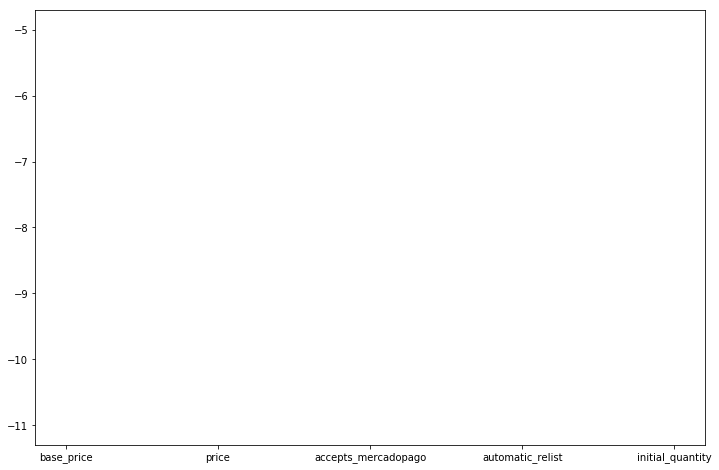

In [17]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(var)
plt.xticks(np.arange(5),list(X.columns));

### Correlacion de variables

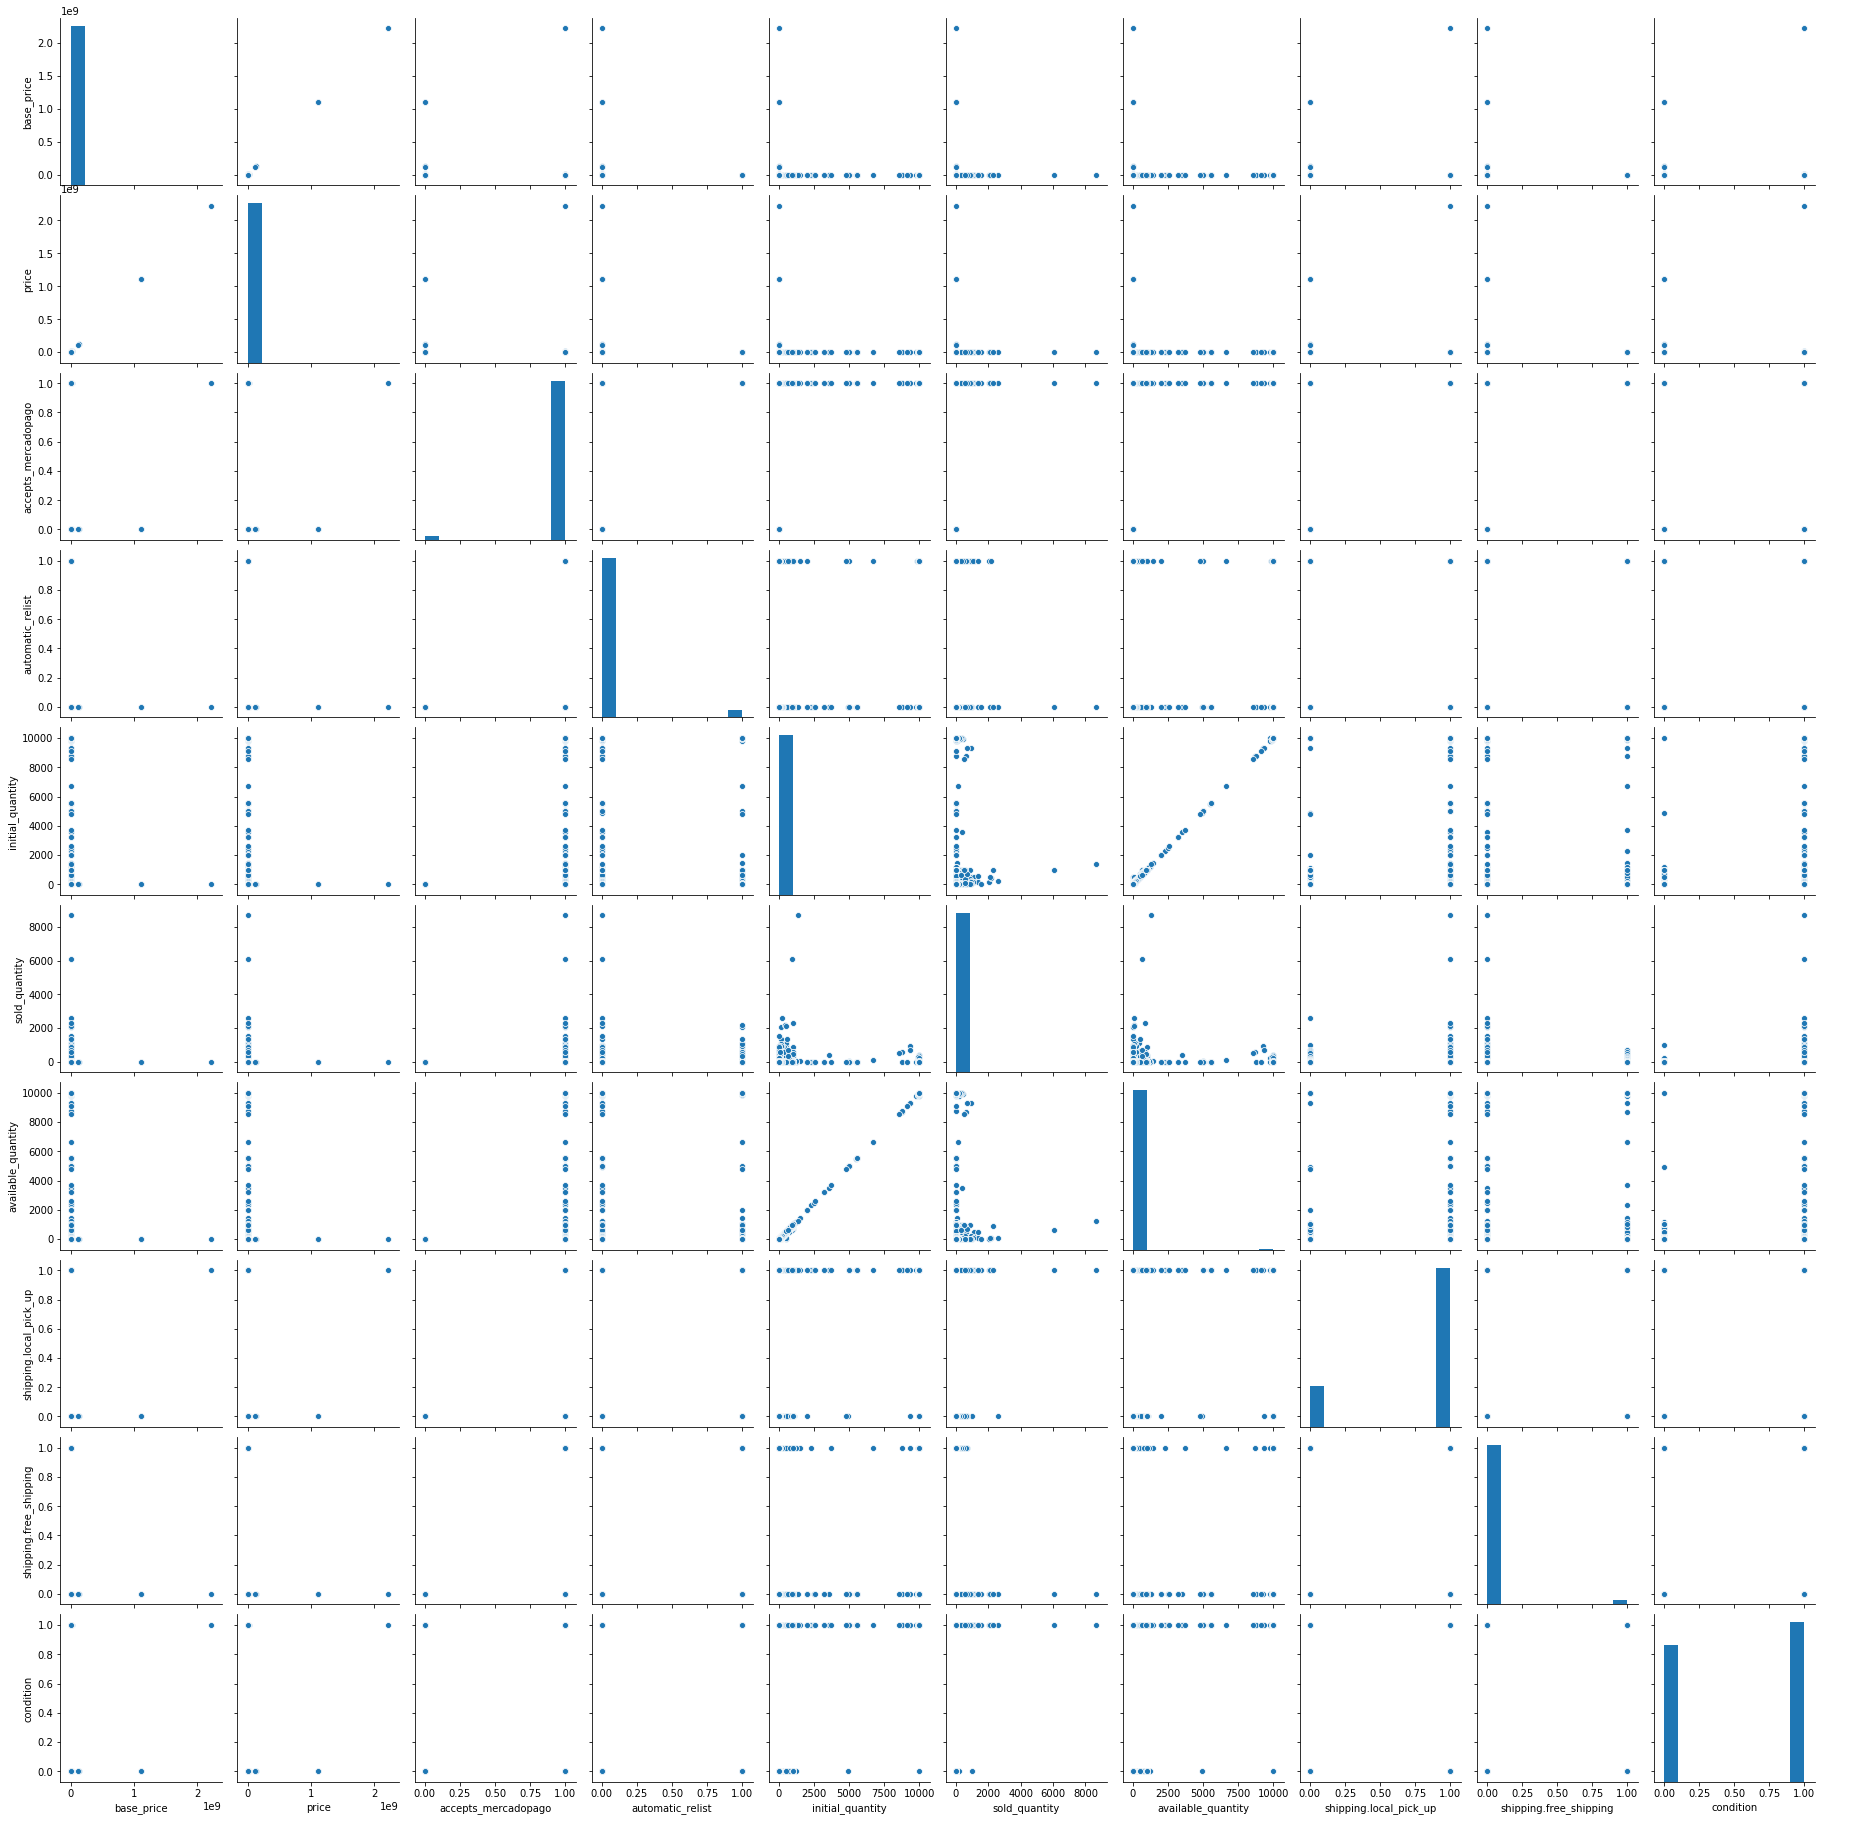

In [14]:
import seaborn as sns

Z = pd.concat([X,y],axis=1)
sns.pairplot(Z)

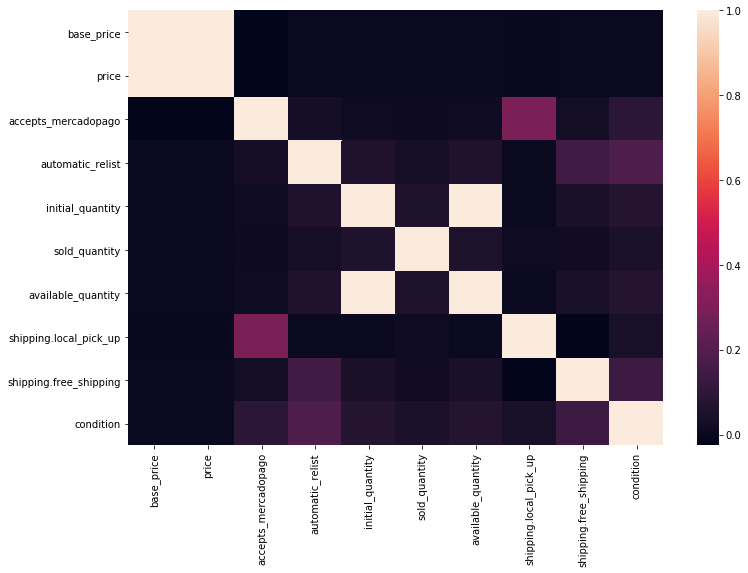

In [15]:
Z3 = pd.concat([X,y],axis=1)
sns.heatmap(Z3.corr())

## CONCLUSIÓN


Regresión Lasso y correlación de variables no nos determina una feature mas importante que el resto. Por lo cual en la proxima notebook analizamos usando los modelos de sklearn para obtener el mejor modelo